<a href="https://colab.research.google.com/github/ilhamrozie/pyreservoir_exercise/blob/main/assignment3_Mohamad_Ilham_SPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

This assignment is about the application of Python for well-test analysis. You're given a CSV data (have been loaded here), and your task is to **simulate the well transient response** (not to analyze it).

### Given reservoir properties

* Reservoir initial pressure 3,000 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 1,000 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 10 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 8,000 ft 
* Oil FVF 1.33 RB/STB

### Read instruction carefully 😊

* To help you coding, refer to the section about "Modeling a Multirate Test" and "Modeling a Multiple Pressure Test" in our [session 5 notebook](https://bit.ly/python-welltest).

* There are 3 columns in the data, "Time" (in hours), "Rate" (in $m^3$/hr), and "Pressure" (in bar). 

* Don't forget to convert the "Rate" to barrel/day and convert "Pressure" to psia. 

* Do a modeling of multirate test using the "Time" and "Rate" data
* Do a modeling of multiple pressure test using the "Time" and "Pressure" data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# cloning to github repository 
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 819 (delta 85), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (819/819), 24.03 MiB | 16.13 MiB/s, done.
Resolving deltas: 100% (439/439), done.


In [ ]:
# import system
import sys
sys.path.append('/content/pyreservoir/welltest')

# functions you will use
from wellflo import * # import all functions
from wellanalysis import constant_rate_drawdown_test, constant_rate_buildup_test

In [ ]:
# filepath of the data
filepath = '/content/pyreservoir/data/welltest/Data_Well_Transient_Modeling.csv'

## Input reservoir properties

In [ ]:
#read csv data, change units on rate and pressure, drop the old rate and pressure columns
df = pd.read_csv(filepath)
df['rate (bpd)'] = df['rate (m3/hr)'] * 150.955 # 1m3/d = 6.29 bpd / 1m3/hr = 150.955 bpd
df['pressure (psia)'] = df['pressure (bar)'] * 14.5038 # 1 bar = 14.5038 psia
df = df.drop(df.columns[[1,2]], axis=1)
df

,time (hr),rate (bpd),pressure (psia)
0,0,483.056,1999.972493
1,10,483.056,1999.972493
2,20,483.056,1999.972493
3,30,483.056,1999.972493
4,40,483.056,1999.972493
...,...,...,...
94,940,150.955,2024.977045
95,950,150.955,2024.977045
96,960,150.955,2024.977045
97,970,150.955,2024.977045


## Modeling the Multirate Test (use timestep 0.1 hour)

In [ ]:
# Input reservoir properties
p_initial = 3000 #psia
poro = 0.15
ct = 12E-6 #microsip
perm = 1000 #md
rw = 4*0.0833 #ft
h = 10 #ft
mu = 2 #cp
re = 8000 #Distance from wellbore to reservoir outer boundary 
Bo = 1.33 #RB/STB


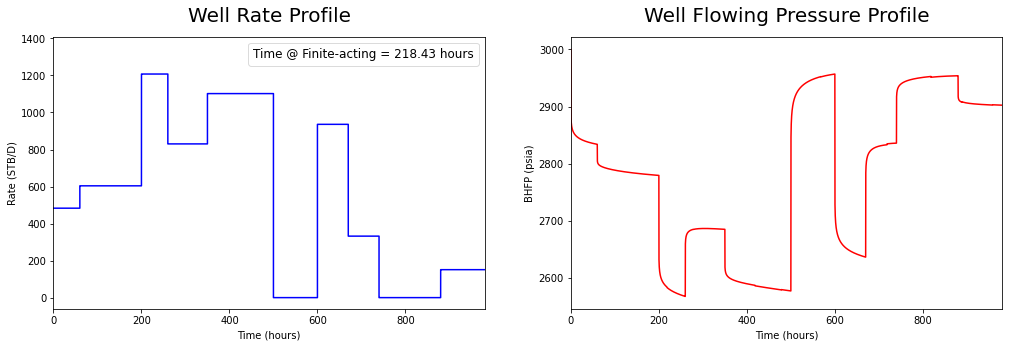

In [ ]:
# Define t and q from data

t_step = 0.1
t = df['time (hr)'].to_numpy()
q = df['rate (bpd)'].to_numpy()

#simulate multirate test
simulate_multirate_test(p_initial, t_step, t, q, re, rw, perm, poro, mu, ct, Bo, h)


## Modeling the Multiple Pressure Test (use timestep 0.1 hour)# 

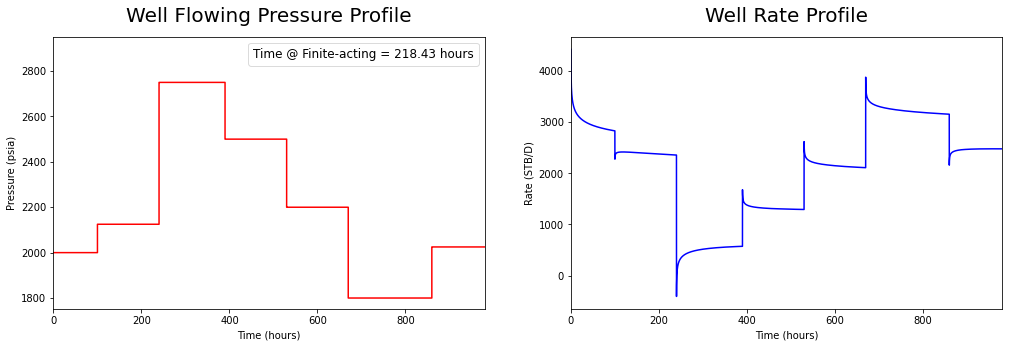

In [ ]:
# Define t and p from data
t = df['time (hr)'].to_numpy()
p = df['pressure (psia)'].to_numpy()

#simulate multipressure test
simulate_multipressure_test(p_initial, t_step, t, p, re, rw, perm, poro, mu, ct, Bo, h)
